# Desafio Titanic do kaggle

## Instalando as ferramentas necessárias

In [11]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 62.9 MB/s eta 0:00:00


In [71]:
import pandas as pd
import sweetviz as sv
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

## importação, limpeza e tratamento dos dados

In [41]:
train = pd.read_csv("/content/train (1).csv")
test = pd.read_csv("/content/test (1).csv")

train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Ànalise exploratória dos dados

In [14]:
sr = sv.analyze(train, target_feat="Survived")
sr.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Tratamento dos dados vazios

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
train.dtypes.value_counts()

int64      5
object     5
float64    2
dtype: int64

In [22]:
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [24]:
test.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

In [27]:
train.shape

((891, 12), (418, 11))

In [28]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
train.nunique().sort_values(ascending=False)

PassengerId    891
Name           891
Ticket         681
Fare           248
Cabin          147
Age             88
SibSp            7
Parch            7
Pclass           3
Embarked         3
Survived         2
Sex              2
dtype: int64

In [42]:
train = train.drop(["Cabin", "Name", "Ticket"], axis=1)

In [44]:
test = test.drop(["Cabin", "Name", "Ticket"], axis=1)

In [43]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [45]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500,S
414,1306,1,female,39.0,0,0,108.9000,C
415,1307,3,male,38.5,0,0,7.2500,S
416,1308,3,male,NaN,0,0,8.0500,S


In [46]:
train.Age.mean()

29.69911764705882

In [50]:
train.loc[train.Age.isnull(), 'Age'] = train.Age.mean()

In [51]:
test.loc[test.Age.isnull(), 'Age'] = test.Age.mean()

In [53]:
train.Embarked.mode()[0]

'S'

In [54]:
train.loc[train.Embarked.isnull(), 'Embarked'] = train.Embarked.mode()[0]

In [55]:
test.loc[test.Embarked.isnull(), 'Embarked'] = test.Embarked.mode()[0]

In [58]:
test.loc[test.Fare.isnull(), "Fare"] = test.Fare.mean()

In [59]:
train.isnull().sum().sort_values(ascending=False)

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [60]:
test.isnull().sum().sort_values(ascending=False)

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

### Tratamento dos dados para o modelo de ML

### One hot encode

In [78]:
train = pd.get_dummies(train)
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.000000,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.000000,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0,1,0,0,1
887,888,1,1,19.000000,0,0,30.0000,1,0,0,0,1
888,889,0,3,29.699118,1,2,23.4500,1,0,0,0,1
889,890,1,1,26.000000,0,0,30.0000,0,1,1,0,0


### Separação entre x e y

In [79]:
x = train.drop(["Survived", "PassengerId"], axis=1)
y = train["Survived"]
x, y

(     Pclass        Age  SibSp  Parch     Fare  Sex_female  Sex_male  \
 0         3  22.000000      1      0   7.2500           0         1   
 1         1  38.000000      1      0  71.2833           1         0   
 2         3  26.000000      0      0   7.9250           1         0   
 3         1  35.000000      1      0  53.1000           1         0   
 4         3  35.000000      0      0   8.0500           0         1   
 ..      ...        ...    ...    ...      ...         ...       ...   
 886       2  27.000000      0      0  13.0000           0         1   
 887       1  19.000000      0      0  30.0000           1         0   
 888       3  29.699118      1      2  23.4500           1         0   
 889       1  26.000000      0      0  30.0000           0         1   
 890       3  32.000000      0      0   7.7500           0         1   
 
      Embarked_C  Embarked_Q  Embarked_S  
 0             0           0           1  
 1             1           0           0  
 2   

### Sets de treino e teste(reais)

In [81]:
x_train, x_real, y_train, y_real = train_test_split(x, y, test_size=0.2, random_state=42)
x_train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
331,1,45.500000,0,0,28.5000,0,1,0,0,1
733,2,23.000000,0,0,13.0000,0,1,0,0,1
382,3,32.000000,0,0,7.9250,0,1,0,0,1
704,3,26.000000,1,0,7.8542,0,1,0,0,1
813,3,6.000000,4,2,31.2750,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
106,3,21.000000,0,0,7.6500,1,0,0,0,1
270,1,29.699118,0,0,31.0000,0,1,0,0,1
860,3,41.000000,2,0,14.1083,0,1,0,0,1
435,1,14.000000,1,2,120.0000,1,0,0,0,1


### Normalização dos dados

In [88]:
scaler = MinMaxScaler()

x_train_normal = scaler.fit_transform(x_train)
x_real_normal = scaler.fit_transform(x_real)

x_train_normal

array([[0.        , 0.56647399, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.5       , 0.28373963, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.39683338, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [1.        , 0.50992712, 0.25      , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.17064589, 0.125     , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.25860769, 0.        , ..., 0.        , 0.        ,
        1.        ]])

## Criação dos modelos de ML

### Modelo de Àrvore de Decisão

In [84]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)

In [85]:
dtc.fit(x_train_normal, y_train)

DecisionTreeClassifier(random_state=42)

In [97]:
y_preds_dtc = dtc.predict(x_real_normal)

### Modelo de Regressão Logística

In [95]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)

In [103]:
lr.fit(x_train_normal, y_train)

LogisticRegression(random_state=42)

In [104]:
y_preds_lr = lr.predict(x_real_normal)

### Printando a acurácia dos modelos

In [118]:
from sklearn.metrics import accuracy_score
print(f"A acurácia do modelo de árvore de decisão é de: {accuracy_score(y_real, y_preds_dtc) * 100}%")
print(f"A acurácia do modelo de regressão logística é de: {accuracy_score(y_real, y_preds_lr) * 100}%")

A acurácia do modelo de árvore de decisão é de: 75.97765363128491%
A acurácia do modelo de regressão logística é de: 80.44692737430168%


### Vizaulização dos resultados

In [139]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [123]:
confusion_matrix(y_real, y_preds_dtc)

array([[90, 15],
       [28, 46]])

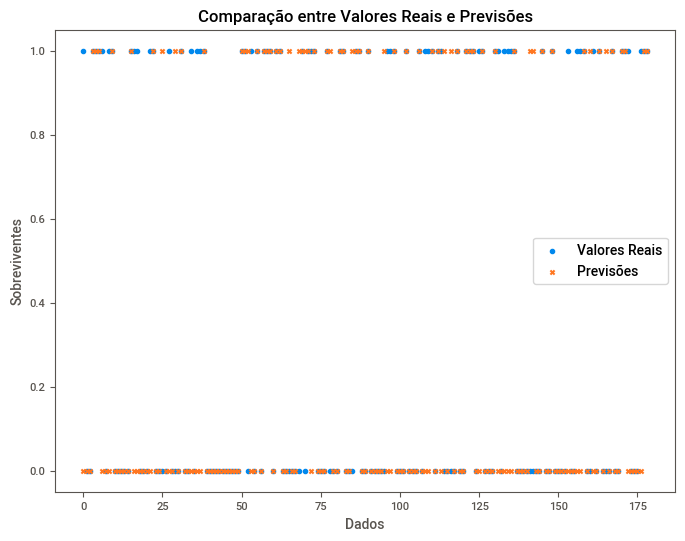

In [148]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_real)), y_real, label="Valores Reais", marker='o')
plt.scatter(range(len(y_preds_dtc)), y_preds_dtc, label="Previsões", marker='x')
plt.xlabel("Dados")
plt.ylabel("Sobreviventes")
plt.title("Comparação entre Valores Reais e Previsões")
plt.legend()
plt.show()

In [121]:
confusion_matrix(y_real, y_preds_lr)

array([[91, 14],
       [21, 53]])

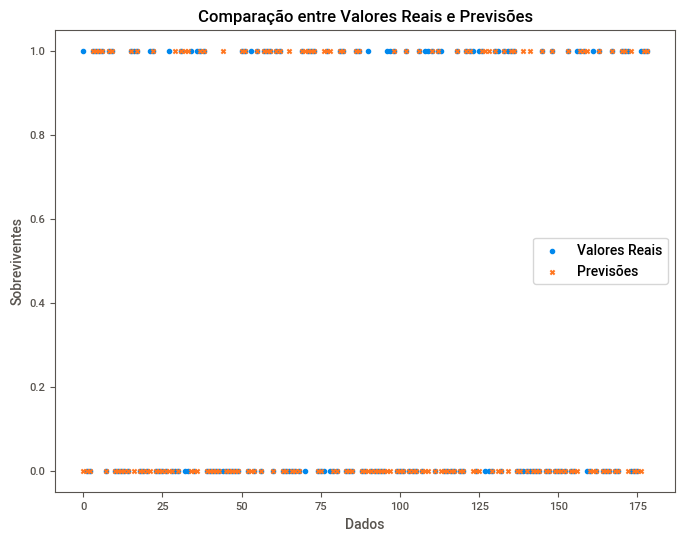

In [147]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_real)), y_real, label="Valores Reais", marker='o')
plt.scatter(range(len(y_preds_lr)), y_preds_lr, label="Previsões", marker='x')
plt.xlabel("Dados")
plt.ylabel("Sobreviventes")
plt.title("Comparação entre Valores Reais e Previsões")
plt.legend()
plt.show()

#### O modelo de Regressão teve melhores resultados

# previsão nos dados de teste

In [124]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.50000,0,0,7.8292,Q
1,893,3,female,47.00000,1,0,7.0000,S
2,894,2,male,62.00000,0,0,9.6875,Q
3,895,3,male,27.00000,0,0,8.6625,S
4,896,3,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,30.27259,0,0,8.0500,S
414,1306,1,female,39.00000,0,0,108.9000,C
415,1307,3,male,38.50000,0,0,7.2500,S
416,1308,3,male,30.27259,0,0,8.0500,S


In [125]:
test = pd.get_dummies(test)
test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.50000,0,0,7.8292,0,1,0,1,0
1,893,3,47.00000,1,0,7.0000,1,0,0,0,1
2,894,2,62.00000,0,0,9.6875,0,1,0,1,0
3,895,3,27.00000,0,0,8.6625,0,1,0,0,1
4,896,3,22.00000,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,0,1,0,0,1
414,1306,1,39.00000,0,0,108.9000,1,0,1,0,0
415,1307,3,38.50000,0,0,7.2500,0,1,0,0,1
416,1308,3,30.27259,0,0,8.0500,0,1,0,0,1


In [127]:
x_test = test.drop("PassengerId", axis=1)
x_test = scaler.fit_transform(x_test)
x_test

array([[1.        , 0.4527232 , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.61756561, 0.125     , ..., 0.        , 0.        ,
        1.        ],
       [0.5       , 0.8153765 , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [1.        , 0.50547277, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.39697468, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.39697468, 0.125     , ..., 1.        , 0.        ,
        0.        ]])

In [128]:
final_pred = lr.predict(x_test)

In [130]:
test["Survived"] = final_pred

In [135]:
submission = test[["PassengerId", "Survived"]]
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [138]:
submission.to_csv('submit1.csv', index=False)

## Pontuação final na competição

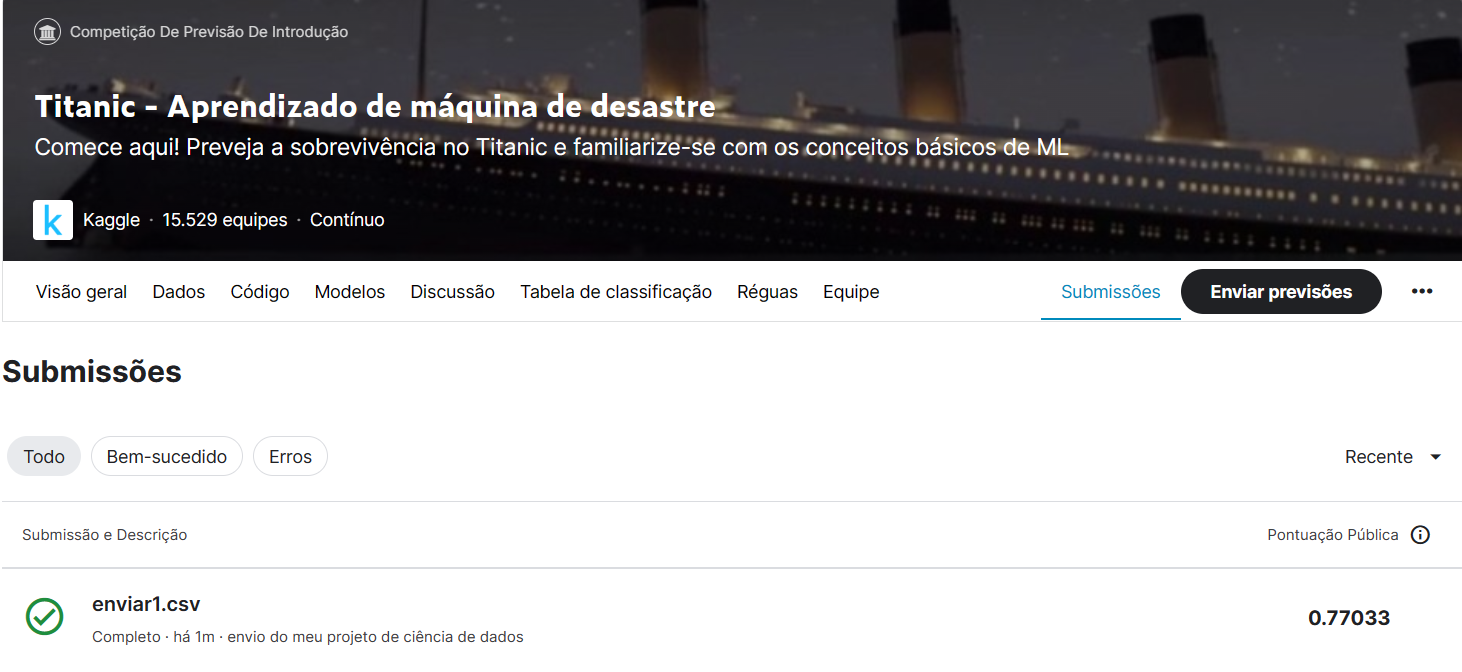